# An√°lise de Dados para reduzir o tempo de entrega - Dasa

## Dataset: [Link](./data/dasa-final.csv)

## Objetivo: 
Mudan√ßas que devem ser feitas para garantir a redu√ß√£o do tempo de entrega dos resultados laboratoriais em pelo 
menos 10%

## Importando Bibliotecas & Helpers

In [1]:
from utils.helpers import format_integer

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown

sns.set_style(style="whitegrid")

colunas_ordenadas = [
    # Context (Where and When)
    "unidade",
    "mes",
    "dia_fechamento",

    # Core Operations
    "pacientes_dia",
    "exames_realizados",
    "tipo_exame",
    "turno_mais_movimentado",
    "hora_inicio_turno",
    "temp_medio_exame",
    "tempo_entrega_resultado",

    # Equipment & Procedures
    "protocolo_emergencia",
    "quantidade_refrigeradores",
    "tipo_refrigeracao",
    "alinhamento_refrigeradores",
    "direcao_centrifuga",

    # Personnel
    "chefe_setor",
    "cpf_biomedico",
    "cor_jaleco_funcionario",
    "mes_nascimento_biomedico",

    # Environmental Ambiance
    "musica_ambiente",
    "cheiro_ambiente",
    "aromatizador_eucalipto",
    "elemento_decorativo",
    
    # Physical Infrastructure
    "cor_parede_laboratorio",
    "cor_parede_coleta",
    "janela_virada_para",
]

## Lendo o dataset

In [2]:
df_dasa = pd.read_csv('./data/dasa-final.csv', sep=',')

In [3]:
dimensoes = f"{format_integer(df_dasa.shape[0])} registros, {format_integer(df_dasa.shape[1])} colunas"

markdown_text = f"""
**Dimens√µes:** {dimensoes}  
"""


df_dasa = df_dasa[colunas_ordenadas]
display(Markdown(markdown_text))

df_dasa.head()


**Dimens√µes:** 1.000 registros, 26 colunas  


unidade       mes  dia_fechamento  pacientes_dia  exames_realizados  \
0  Unidade C  jun/2025              23             52                 72   
1  Unidade E  mai/2025               3             56                 48   
2  Unidade A  mai/2025               8             44                 67   
3  Unidade D  fev/2025              17             51                 57   
4  Unidade D  jul/2024              29             56                 69   

  tipo_exame turno_mais_movimentado  hora_inicio_turno  temp_medio_exame  \
0     sangue                  manh√£                  9              20.1   
1     imagem                  tarde                  7              16.6   
2        NaN                  manh√£                 12              18.6   
3     imagem                  noite                  8              10.0   
4      urina                  noite                 12              24.4   

   tempo_entrega_resultado  ... cpf_biomedico  cor_jaleco_funcionario  \
0                    22.17  ...   97069094493             verde_limao   
1                    33.48  ...   87320570731               azul_bebe   
2                    41.57  ...   37306026087                  branco   
3                    34.92  ...   56594789692               azul_bebe   
4                    32.59  ...   38100952961             verde_limao   

  mes_nascimento_biomedico musica_ambiente cheiro_ambiente  \
0                      set         nenhuma            caf√©   
1                      nov         nenhuma         lavanda   
2                      mar      pagode_90s            caf√©   
3                      nov         nenhuma         lavanda   
4                      jul         nenhuma            caf√©   

  aromatizador_eucalipto  elemento_decorativo cor_parede_laboratorio  \
0                    n√£o                cacto                  verde   
1                    n√£o               nenhum                   azul   
2                    n√£o               nenhum                  cinza   
3                    n√£o                cacto                grafite   
4                    n√£o           vaso_bambu                   azul   

  cor_parede_coleta janela_virada_para  
0             verde              leste  
1           amarela            nenhuma  
2           laranja              norte  
3      azul_cobalto            nenhuma  
4             verde              leste  

[5 rows x 26 columns]

In [4]:
df_dasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unidade                     1000 non-null   object 
 1   mes                         1000 non-null   object 
 2   dia_fechamento              1000 non-null   int64  
 3   pacientes_dia               1000 non-null   int64  
 4   exames_realizados           1000 non-null   int64  
 5   tipo_exame                  921 non-null    object 
 6   turno_mais_movimentado      1000 non-null   object 
 7   hora_inicio_turno           1000 non-null   int64  
 8   temp_medio_exame            920 non-null    float64
 9   tempo_entrega_resultado     1000 non-null   float64
 10  protocolo_emergencia        920 non-null    object 
 11  quantidade_refrigeradores   1000 non-null   int64  
 12  tipo_refrigeracao           1000 non-null   object 
 13  alinhamento_refrigeradores  1000 n

In [5]:
def generate_unique_values_table(df):
    colunas_selecionadas = df.select_dtypes(include=["object", "bool", "category", "boolean"]).columns
    
    if colunas_selecionadas.empty:
        return "Nenhuma coluna do tipo object, bool, category ou boolean encontrada."

    data_valores_unicos = []

    for coluna in colunas_selecionadas:
        value_counts = df[coluna].value_counts(dropna=False)
        
        if len(value_counts) < 100:
            values_list = ['NaN' if pd.isna(val) else str(val) for val in value_counts.index]
            data_valores_unicos.append({"Coluna": coluna, "Valores": values_list})
    
    if not data_valores_unicos:
        return "Nenhuma coluna com menos de 100 valores √∫nicos encontrada."

    df_valores_unicos = pd.DataFrame(data_valores_unicos)

    markdown_table = "| Coluna                     | Valores |\n"
    markdown_table += "|----------------------------|---------|\n"
    for _, row in df_valores_unicos.iterrows():
        markdown_table += f"| {row['Coluna']:<28} | {', '.join(row['Valores'])} |\n"

    return markdown_table

display(Markdown("### Valores √önicos por Coluna Categ√≥rica"))
display(Markdown(generate_unique_values_table(df_dasa)))

### Valores √önicos por Coluna Categ√≥rica

| Coluna                     | Valores |
|----------------------------|---------|
| unidade                      | Unidade E, Unidade D, Unidade A, Unidade C, Unidade B, Unidade F |
| mes                          | mar/2024, ago/2024, ago/2025, nov/2025, set/2024, out/2024, jan/2025, mai/2024, jul/2024, jan/2024, jun/2025, fev/2024, nov/2024, set/2025, dez/2025, mai/2025, out/2025, dez/2024, abr/2024, mar/2025, jun/2024, fev/2025, jul/2025, abr/2025 |
| tipo_exame                   | sangue, urina, imagem, covid, gen√©tico, alergia, hormonal, NaN, ??!!## |
| turno_mais_movimentado       | manh√£, tarde, noite |
| protocolo_emergencia         | n√£o, sim, NaN |
| tipo_refrigeracao            | climatizada, seca, umida, controlada |
| alinhamento_refrigeradores   | lado_a_lado, dispersos, em_L |
| direcao_centrifuga           | oeste, leste, sul, norte |
| chefe_setor                  | Carlos, Julia, Bianca, Eduardo, Marcos, Nina, Ana, Jos√©, 1234, 1113 |
| cor_jaleco_funcionario       | azul_bebe, verde_limao, branco, vinho |
| mes_nascimento_biomedico     | jul, jan, ago, nov, dez, jun, mai, set, out, mar, abr, fev |
| musica_ambiente              | nenhuma, rock, jazz, pagode_90s |
| cheiro_ambiente              | caf√©, lavanda, eucalipto, nenhum |
| aromatizador_eucalipto       | n√£o, sim |
| elemento_decorativo          | nenhum, vaso_bambu, cacto, samambaia |
| cor_parede_laboratorio       | amarela, azul, cinza, laranja, grafite, verde, branca, vinho, azul_cobalto, GRAFITE #007 |
| cor_parede_coleta            | branca, azul_cobalto, roxa, amarela, laranja, verde |
| janela_virada_para           | nenhuma, oeste, sul, leste, norte |


## Formatando os dados

1. Converter colunas num√©ricas para tipos mais eficientes  
2. Converter colunas bin√°rias ('sim'/'n√£o') para booleanos  
3. Limpar erros de digita√ß√£o em colunas categ√≥ricas
4. Converter colunas de texto para o tipo 'category'  
5. Tratar valores ausentes  
6. Verificar os novos tipos de dados  

In [6]:
df_dasa_formatted = df_dasa.copy()

df_dasa_formatted['pacientes_dia'] = df_dasa['pacientes_dia'].astype('int16')
df_dasa_formatted['exames_realizados'] = df_dasa['exames_realizados'].astype('int16')
df_dasa_formatted['quantidade_refrigeradores'] = df_dasa['quantidade_refrigeradores'].astype('int8')
df_dasa_formatted['hora_inicio_turno'] = df_dasa['hora_inicio_turno'].astype('int8')
df_dasa_formatted['dia_fechamento'] = df_dasa['dia_fechamento'].astype('int8')

mapeamento_bool = {'sim': True, 'n√£o': False}
df_dasa_formatted['protocolo_emergencia'] = df_dasa['protocolo_emergencia'].map(mapeamento_bool).astype('boolean')
df_dasa_formatted['aromatizador_eucalipto'] = df_dasa['aromatizador_eucalipto'].map(mapeamento_bool).astype(bool)

df_dasa_formatted['tipo_exame'] = df_dasa_formatted['tipo_exame'].replace({'??!!##': np.nan})
df_dasa_formatted['cor_parede_laboratorio'] = df_dasa_formatted['cor_parede_laboratorio'].replace({'GRAFITE #007': 'grafite'})

df_dasa_formatted['cpf_biomedico'] = df_dasa_formatted['cpf_biomedico'].astype('string')

colunas_categoricas = [
    'unidade', 'mes', 'tipo_exame', 'turno_mais_movimentado', 'direcao_centrifuga',
    'alinhamento_refrigeradores', 'cor_parede_laboratorio', 'cor_parede_coleta',
    'cheiro_ambiente', 'musica_ambiente', 'cor_jaleco_funcionario',
    'elemento_decorativo', 'janela_virada_para', 'mes_nascimento_biomedico',
    'chefe_setor', 'tipo_refrigeracao'
]

for col in colunas_categoricas:
    df_dasa_formatted[col] = df_dasa_formatted[col].astype('category')



df_dasa_formatted.info()

display(Markdown("### Valores √önicos por Coluna Categ√≥rica"))
display(Markdown(generate_unique_values_table(df_dasa_formatted)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   unidade                     1000 non-null   category
 1   mes                         1000 non-null   category
 2   dia_fechamento              1000 non-null   int8    
 3   pacientes_dia               1000 non-null   int16   
 4   exames_realizados           1000 non-null   int16   
 5   tipo_exame                  911 non-null    category
 6   turno_mais_movimentado      1000 non-null   category
 7   hora_inicio_turno           1000 non-null   int8    
 8   temp_medio_exame            920 non-null    float64 
 9   tempo_entrega_resultado     1000 non-null   float64 
 10  protocolo_emergencia        920 non-null    boolean 
 11  quantidade_refrigeradores   1000 non-null   int8    
 12  tipo_refrigeracao           1000 non-null   category
 13  alinhamento_refrige

### Valores √önicos por Coluna Categ√≥rica

| Coluna                     | Valores |
|----------------------------|---------|
| unidade                      | Unidade E, Unidade D, Unidade A, Unidade C, Unidade B, Unidade F |
| mes                          | mar/2024, ago/2024, ago/2025, nov/2025, set/2024, jan/2025, mai/2024, out/2024, jul/2024, jan/2024, jun/2025, fev/2024, nov/2024, dez/2025, set/2025, mai/2025, out/2025, dez/2024, abr/2024, mar/2025, jun/2024, fev/2025, jul/2025, abr/2025 |
| tipo_exame                   | sangue, urina, imagem, covid, gen√©tico, alergia, hormonal, NaN |
| turno_mais_movimentado       | manh√£, tarde, noite |
| protocolo_emergencia         | False, True, NaN |
| tipo_refrigeracao            | climatizada, seca, umida, controlada |
| alinhamento_refrigeradores   | lado_a_lado, dispersos, em_L |
| direcao_centrifuga           | oeste, leste, sul, norte |
| chefe_setor                  | Carlos, Julia, Nina, Marcos, Eduardo, Bianca, Ana, Jos√©, 1234, 1113 |
| cor_jaleco_funcionario       | azul_bebe, verde_limao, branco, vinho |
| mes_nascimento_biomedico     | jul, jan, ago, nov, dez, jun, mai, out, set, mar, abr, fev |
| musica_ambiente              | nenhuma, rock, jazz, pagode_90s |
| cheiro_ambiente              | caf√©, eucalipto, lavanda, nenhum |
| aromatizador_eucalipto       | False, True |
| elemento_decorativo          | nenhum, vaso_bambu, cacto, samambaia |
| cor_parede_laboratorio       | amarela, azul, cinza, grafite, laranja, verde, branca, vinho, azul_cobalto |
| cor_parede_coleta            | branca, azul_cobalto, amarela, roxa, laranja, verde |
| janela_virada_para           | nenhuma, oeste, sul, leste, norte |


## An√°lisando a Correla√ß√£o entre as vari√°veis

### Separando vari√°veis num√©ricas e categ√≥ricas

In [ ]:
numerical_cols = df_dasa_formatted.select_dtypes(
    include=["int16", "int8", "int64", "float64"]
).columns
categorical_cols = df_dasa_formatted.select_dtypes(include=["category", "bool", "boolean"]).columns

markdown_table = (
    """
| Tipo de Vari√°vel | Colunas |
|------------------|---------|
""" +
    f"| Num√©ricas        | {', '.join(numerical_cols)} |\n"
    f"| Categ√≥ricas      | {', '.join(categorical_cols)} |\n"
)

display(Markdown(markdown_table))

| Tipo de Vari√°vel | Colunas |
|------------------|---------|
| Num√©ricas        | dia_fechamento, pacientes_dia, exames_realizados, hora_inicio_turno, temp_medio_exame, tempo_entrega_resultado, quantidade_refrigeradores |
| Categ√≥ricas      | unidade, mes, tipo_exame, turno_mais_movimentado, protocolo_emergencia, tipo_refrigeracao, alinhamento_refrigeradores, direcao_centrifuga, chefe_setor, cor_jaleco_funcionario, mes_nascimento_biomedico, musica_ambiente, cheiro_ambiente, aromatizador_eucalipto, elemento_decorativo, cor_parede_laboratorio, cor_parede_coleta, janela_virada_para |


### An√°lise das vari√°veis num√©ricas em rela√ß√£o ao tempo de entrega

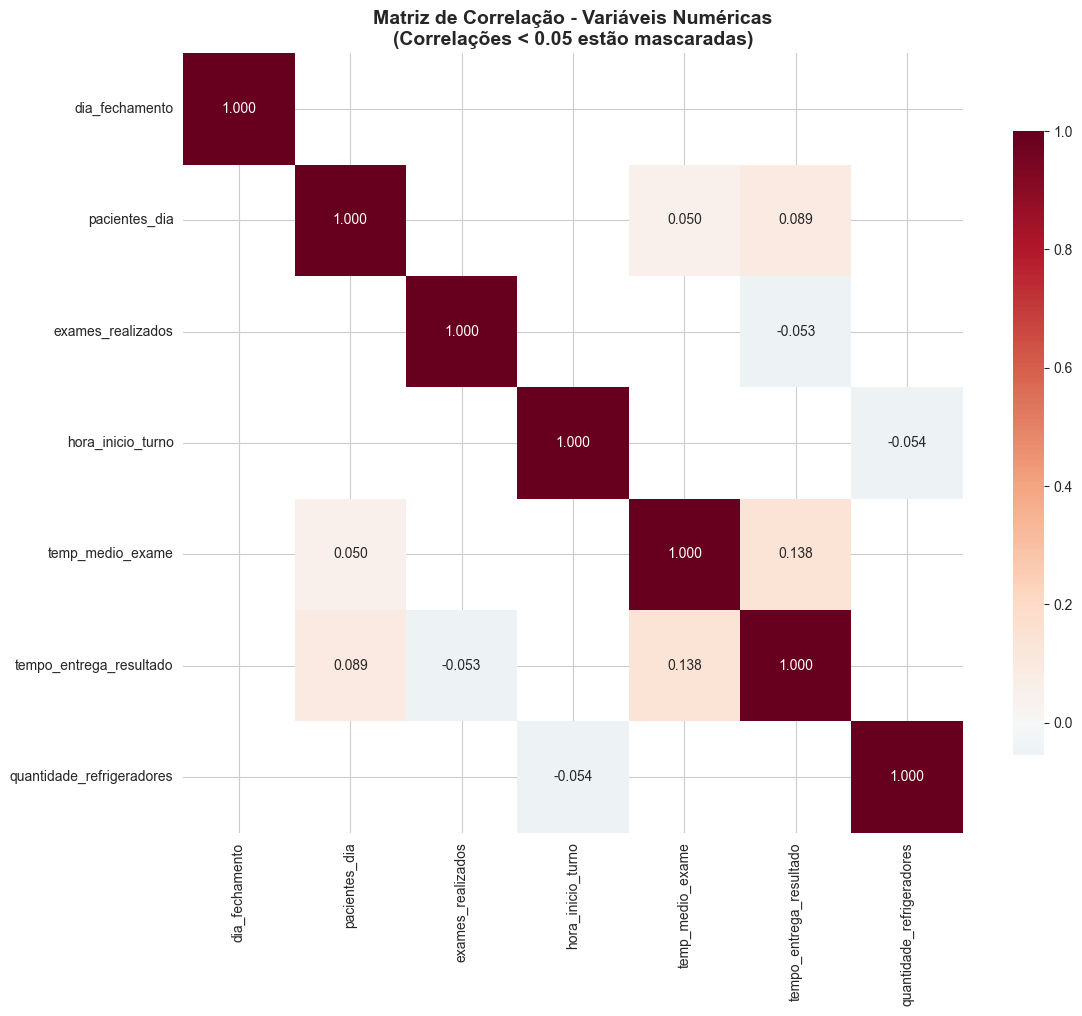

### Correla√ß√µes com Tempo de Entrega (ordenadas por for√ßa):

| Vari√°vel                     | Correla√ß√£o | Dire√ß√£o   |
|------------------------------|------------|-----------|
| temp_medio_exame             | 0.138     | positiva |
| pacientes_dia                | 0.089     | positiva |
| exames_realizados            | 0.053     | negativa |
| dia_fechamento               | 0.046     | negativa |
| quantidade_refrigeradores    | 0.014     | negativa |
| hora_inicio_turno            | 0.014     | positiva |


### Teste T para Vari√°veis Num√©ricas

| Vari√°vel                     | Estat√≠stica T | P-valor   | Signific√¢ncia |
|------------------------------|---------------|-----------|---------------|
| temp_medio_exame             | 4.187       | 0.000031 | Sim |
| pacientes_dia                | 2.073       | 0.038439 | Sim |
| exames_realizados            | -1.911       | 0.056309 | N√£o |
| dia_fechamento               | -1.552       | 0.120869 | N√£o |
| hora_inicio_turno            | 0.240       | 0.810001 | N√£o |
| quantidade_refrigeradores    | -0.183       | 0.854855 | N√£o |

### Teste Mann-Whitney para Vari√°veis Num√©ricas

| Vari√°vel                     | Estat√≠stica U | P-valor   | Signific√¢ncia |
|------------------------------|---------------|-----------|---------------|
| temp_medio_exame             | 123339.000       | 0.000013 | Sim |
| pacientes_dia                | 133053.500       | 0.053965 | N√£o |
| exames_realizados            | 116225.000       | 0.054677 | N√£o |
| dia_fechamento               | 118045.000       | 0.143875 | N√£o |
| quantidade_refrigeradores    | 123348.500       | 0.787230 | N√£o |
| hora_inicio_turno            | 125676.000       | 0.799783 | N√£o |


In [8]:
correlation_matrix = df_dasa_formatted[numerical_cols].corr()

plt.figure(figsize=(12, 10))
mask = correlation_matrix.abs() < 0.05
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="RdBu_r",
    center=0,
    square=True,
    fmt=".3f",
    cbar_kws={"shrink": 0.8},
    mask=mask,
)
plt.title(
    "Matriz de Correla√ß√£o - Vari√°veis Num√©ricas\n(Correla√ß√µes < 0.05 est√£o mascaradas)",
    fontsize=14,
    fontweight="bold",
)
plt.tight_layout()
plt.savefig('./imgs/correlation_matrix_dasa.png')
plt.show()


target_correlations = (
    correlation_matrix["tempo_entrega_resultado"].abs().sort_values(ascending=False)
)
markdown_output = "### Correla√ß√µes com Tempo de Entrega (ordenadas por for√ßa):\n\n"
markdown_output += "| Vari√°vel                     | Correla√ß√£o | Dire√ß√£o   |\n"
markdown_output += "|------------------------------|------------|-----------|\n"

for var, corr in target_correlations.items():
    if var != "tempo_entrega_resultado":
        direction = (
            "positiva"
            if correlation_matrix.loc["tempo_entrega_resultado", var] > 0
            else "negativa"
        )
        markdown_output += f"| {var:<28} | {corr:.3f}     | {direction} |\n"

display(Markdown(markdown_output))

ttest_results = []
mannwhitney_results = []

for var in numerical_cols:
    if var != "tempo_entrega_resultado":
        median_value = df_dasa_formatted[var].median()
        group_above = df_dasa_formatted[df_dasa_formatted[var] > median_value][
            "tempo_entrega_resultado"
        ]
        group_below = df_dasa_formatted[df_dasa_formatted[var] <= median_value][
            "tempo_entrega_resultado"
        ]

        t_stat, p_value_ttest = stats.ttest_ind(
            group_above, group_below, equal_var=False, nan_policy="omit"
        )
        ttest_results.append((var, t_stat, p_value_ttest))

        u_stat, p_value_mannwhitney = stats.mannwhitneyu(
            group_above, group_below, alternative="two-sided"
        )
        mannwhitney_results.append((var, u_stat, p_value_mannwhitney))


ttest_results_sorted = sorted(ttest_results, key=lambda x: x[2])
mannwhitney_results_sorted = sorted(mannwhitney_results, key=lambda x: x[2])


markdown_output = "### Teste T para Vari√°veis Num√©ricas\n\n"
markdown_output += (
    "| Vari√°vel                     | Estat√≠stica T | P-valor   | Signific√¢ncia |\n"
)
markdown_output += (
    "|------------------------------|---------------|-----------|---------------|\n"
)

for var, t_stat, p_value in ttest_results_sorted:
    significancia = "Sim" if p_value < 0.05 else "N√£o"
    markdown_output += (
        f"| {var:<28} | {t_stat:.3f}       | {p_value:.6f} | {significancia} |\n"
    )

markdown_output += "\n### Teste Mann-Whitney para Vari√°veis Num√©ricas\n\n"
markdown_output += (
    "| Vari√°vel                     | Estat√≠stica U | P-valor   | Signific√¢ncia |\n"
)
markdown_output += (
    "|------------------------------|---------------|-----------|---------------|\n"
)

for var, u_stat, p_value in mannwhitney_results_sorted:
    significancia = "Sim" if p_value < 0.05 else "N√£o"
    markdown_output += (
        f"| {var:<28} | {u_stat:.3f}       | {p_value:.6f} | {significancia} |\n"
    )

display(Markdown(markdown_output))

In [9]:
def analyze_categorical_impact(df, cat_var, target_var):
    grouped = (
        df.groupby(cat_var, observed=False)[target_var]
        .agg(["mean", "median", "std", "count"])
        .round(3)
        .sort_values("mean", ascending=False)
    )

    max_mean = grouped["mean"].max()
    min_mean = grouped["mean"].min()
    impact = max_mean - min_mean

    categories = grouped.index
    groups_data = [df[target_var][df[cat_var] == cat].dropna() for cat in categories]

    p_value_anova = None
    if len(groups_data) >= 2:
        _, p_value_anova = stats.f_oneway(*groups_data)

    p_value_kruskal = None
    if len(groups_data) >= 2:
        _, p_value_kruskal = stats.kruskal(*groups_data)

    return grouped, impact, p_value_anova, p_value_kruskal


impact_results = []
for var in categorical_cols:
    grouped, impact, p_value_anova, p_value_kruskal = analyze_categorical_impact(
        df_dasa_formatted, var, "tempo_entrega_resultado"
    )
    impact_results.append((var, impact, grouped, p_value_anova, p_value_kruskal))

impact_results_sorted = sorted(impact_results, key=lambda x: x[1], reverse=True)


markdown_output = (
    "### üìä Ranking de Vari√°veis Categ√≥ricas por Impacto no Tempo de Entrega\n\n"
)
markdown_output += (
    "| Rank | Vari√°vel                     | Impacto (h) | P-valor (ANOVA) | Significativo? (ANOVA) | P-valor (Kruskal) | Significativo? (Kruskal) |\n"
)
markdown_output += (
    "|:----:|:-----------------------------|:-----------:|:---------------:|:----------------------:|:-----------------:|:------------------------:|\n"
)

for rank, (var, impact, grouped, p_value_anova, p_value_kruskal) in enumerate(
    impact_results_sorted, 1
):
    p_value_anova_str = f"{p_value_anova:.4f}" if p_value_anova is not None else "N/A"
    significance_anova_str = (
        "‚úÖ Sim" if p_value_anova is not None and p_value_anova < 0.05 else "‚ùå N√£o"
    )
    p_value_kruskal_str = (
        f"{p_value_kruskal:.4f}" if p_value_kruskal is not None else "N/A"
    )
    significance_kruskal_str = (
        "‚úÖ Sim" if p_value_kruskal is not None and p_value_kruskal < 0.05 else "‚ùå N√£o"
    )

    markdown_output += f"| {rank} | **{var.replace('_', ' ').title()}** | `{impact:.3f}` | `{p_value_anova_str}` | {significance_anova_str} | `{p_value_kruskal_str}` | {significance_kruskal_str} |\n"

markdown_output += "\n### üî¨ Detalhamento das Vari√°veis\n"

for rank, (var, impact, grouped, p_value_anova, p_value_kruskal) in enumerate(
    impact_results_sorted, 1
):
    significance_anova_emoji = (
        "‚úÖ" if p_value_anova is not None and p_value_anova < 0.05 else "‚ùå"
    )
    significance_kruskal_emoji = (
        "‚úÖ" if p_value_kruskal is not None and p_value_kruskal < 0.05 else "‚ùå"
    )
    p_value_anova_formatted = (
        f" (P-valor ANOVA: {p_value_anova:.4f})"
        if p_value_anova is not None
        else ""
    )
    p_value_kruskal_formatted = (
        f" (P-valor Kruskal: {p_value_kruskal:.4f})"
        if p_value_kruskal is not None
        else ""
    )

    markdown_output += (
        f"#### {rank}. {var.replace('_', ' ').title()} {significance_anova_emoji} {significance_kruskal_emoji}\n"
    )
    markdown_output += f"**Impacto Total:** `{impact:.3f} horas`{p_value_anova_formatted}{p_value_kruskal_formatted}\n\n"
    markdown_output += (
        "| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |\n"
    )
    markdown_output += (
        "|:------------------------|:---------:|:-------------:|:---------:|\n"
    )

    for category, categorical_stats in grouped.iterrows():
        markdown_output += f"| {str(category):<23} | `{categorical_stats['mean']:.3f}` | `{categorical_stats['std']:.3f}` | `{int(categorical_stats['count'])}` |\n"
    markdown_output += "\n"

display(Markdown(markdown_output))

### üìä Ranking de Vari√°veis Categ√≥ricas por Impacto no Tempo de Entrega

| Rank | Vari√°vel                     | Impacto (h) | P-valor (ANOVA) | Significativo? (ANOVA) | P-valor (Kruskal) | Significativo? (Kruskal) |
|:----:|:-----------------------------|:-----------:|:---------------:|:----------------------:|:-----------------:|:------------------------:|
| 1 | **Tipo Exame** | `20.585` | `0.0000` | ‚úÖ Sim | `0.0000` | ‚úÖ Sim |
| 2 | **Protocolo Emergencia** | `7.635` | `0.0000` | ‚úÖ Sim | `0.0000` | ‚úÖ Sim |
| 3 | **Mes** | `5.847` | `0.5537` | ‚ùå N√£o | `0.4540` | ‚ùå N√£o |
| 4 | **Chefe Setor** | `5.473` | `0.6803` | ‚ùå N√£o | `0.7750` | ‚ùå N√£o |
| 5 | **Mes Nascimento Biomedico** | `4.289` | `0.3420` | ‚ùå N√£o | `0.3084` | ‚ùå N√£o |
| 6 | **Cor Parede Laboratorio** | `2.679` | `0.2675` | ‚ùå N√£o | `0.3510` | ‚ùå N√£o |
| 7 | **Direcao Centrifuga** | `2.349` | `0.0271` | ‚úÖ Sim | `0.0193` | ‚úÖ Sim |
| 8 | **Cor Jaleco Funcionario** | `1.774` | `0.0892` | ‚ùå N√£o | `0.0738` | ‚ùå N√£o |
| 9 | **Turno Mais Movimentado** | `1.727` | `0.0286` | ‚úÖ Sim | `0.0377` | ‚úÖ Sim |
| 10 | **Elemento Decorativo** | `1.456` | `0.2726` | ‚ùå N√£o | `0.3027` | ‚ùå N√£o |
| 11 | **Unidade** | `1.421` | `0.6680` | ‚ùå N√£o | `0.7925` | ‚ùå N√£o |
| 12 | **Tipo Refrigeracao** | `1.402` | `0.2707` | ‚ùå N√£o | `0.3551` | ‚ùå N√£o |
| 13 | **Cor Parede Coleta** | `1.330` | `0.7688` | ‚ùå N√£o | `0.8795` | ‚ùå N√£o |
| 14 | **Janela Virada Para** | `1.214` | `0.6313` | ‚ùå N√£o | `0.6832` | ‚ùå N√£o |
| 15 | **Cheiro Ambiente** | `1.103` | `0.3852` | ‚ùå N√£o | `0.2787` | ‚ùå N√£o |
| 16 | **Musica Ambiente** | `0.763` | `0.7952` | ‚ùå N√£o | `0.7418` | ‚ùå N√£o |
| 17 | **Alinhamento Refrigeradores** | `0.605` | `0.6354` | ‚ùå N√£o | `0.7464` | ‚ùå N√£o |
| 18 | **Aromatizador Eucalipto** | `0.487` | `0.5197` | ‚ùå N√£o | `0.6038` | ‚ùå N√£o |

### üî¨ Detalhamento das Vari√°veis
#### 1. Tipo Exame ‚úÖ ‚úÖ
**Impacto Total:** `20.585 horas` (P-valor ANOVA: 0.0000) (P-valor Kruskal: 0.0000)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| gen√©tico                | `44.744` | `4.335` | `107` |
| alergia                 | `40.673` | `4.035` | `103` |
| imagem                  | `36.461` | `4.002` | `126` |
| hormonal                | `33.018` | `3.807` | `95` |
| covid                   | `27.360` | `4.111` | `116` |
| sangue                  | `25.827` | `4.680` | `196` |
| urina                   | `24.159` | `4.151` | `168` |

#### 2. Protocolo Emergencia ‚úÖ ‚úÖ
**Impacto Total:** `7.635 horas` (P-valor ANOVA: 0.0000) (P-valor Kruskal: 0.0000)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| True                    | `38.600` | `7.738` | `119` |
| False                   | `30.965` | `8.075` | `801` |

#### 3. Mes ‚ùå ‚ùå
**Impacto Total:** `5.847 horas` (P-valor ANOVA: 0.5537) (P-valor Kruskal: 0.4540)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| dez/2024                | `34.581` | `8.007` | `36` |
| jan/2024                | `33.115` | `9.311` | `44` |
| ago/2024                | `33.072` | `8.724` | `52` |
| mai/2025                | `33.064` | `7.592` | `38` |
| nov/2025                | `33.011` | `8.814` | `48` |
| jan/2025                | `32.924` | `7.028` | `45` |
| jul/2025                | `32.861` | `9.774` | `31` |
| abr/2024                | `32.551` | `7.347` | `35` |
| mar/2024                | `32.538` | `8.506` | `64` |
| out/2025                | `32.271` | `9.967` | `38` |
| mar/2025                | `32.228` | `7.647` | `35` |
| jun/2024                | `32.127` | `9.160` | `34` |
| ago/2025                | `32.023` | `9.073` | `51` |
| out/2024                | `31.724` | `8.680` | `45` |
| mai/2024                | `31.624` | `7.916` | `45` |
| jun/2025                | `31.524` | `8.760` | `43` |
| jul/2024                | `31.493` | `8.433` | `44` |
| nov/2024                | `31.450` | `9.135` | `41` |
| abr/2025                | `31.191` | `9.334` | `28` |
| set/2024                | `31.149` | `7.537` | `47` |
| fev/2024                | `30.526` | `8.490` | `42` |
| set/2025                | `29.941` | `7.382` | `40` |
| dez/2025                | `29.416` | `7.050` | `40` |
| fev/2025                | `28.734` | `7.623` | `34` |

#### 4. Chefe Setor ‚ùå ‚ùå
**Impacto Total:** `5.473 horas` (P-valor ANOVA: 0.6803) (P-valor Kruskal: 0.7750)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| 1234                    | `33.314` | `9.487` | `101` |
| Jos√©                    | `32.321` | `8.341` | `102` |
| Julia                   | `32.086` | `8.497` | `112` |
| Carlos                  | `31.988` | `7.803` | `126` |
| Marcos                  | `31.959` | `8.673` | `111` |
| Eduardo                 | `31.945` | `8.485` | `111` |
| Ana                     | `31.519` | `8.352` | `107` |
| Nina                    | `31.448` | `7.932` | `111` |
| Bianca                  | `31.094` | `8.404` | `111` |
| 1113                    | `27.841` | `6.945` | `8` |

#### 5. Mes Nascimento Biomedico ‚ùå ‚ùå
**Impacto Total:** `4.289 horas` (P-valor ANOVA: 0.3420) (P-valor Kruskal: 0.3084)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| fev                     | `34.223` | `8.461` | `71` |
| abr                     | `32.620` | `7.888` | `72` |
| jul                     | `32.466` | `8.773` | `103` |
| jan                     | `32.349` | `8.741` | `92` |
| dez                     | `32.154` | `8.595` | `85` |
| nov                     | `31.873` | `7.675` | `87` |
| jun                     | `31.677` | `8.035` | `85` |
| set                     | `31.643` | `9.385` | `78` |
| mai                     | `31.584` | `8.238` | `81` |
| ago                     | `31.568` | `8.789` | `91` |
| out                     | `30.964` | `8.635` | `78` |
| mar                     | `29.934` | `7.284` | `77` |

#### 6. Cor Parede Laboratorio ‚ùå ‚ùå
**Impacto Total:** `2.679 horas` (P-valor ANOVA: 0.2675) (P-valor Kruskal: 0.3510)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| vinho                   | `33.514` | `8.503` | `97` |
| verde                   | `33.304` | `9.474` | `103` |
| azul_cobalto            | `32.037` | `8.509` | `90` |
| laranja                 | `31.846` | `8.318` | `110` |
| amarela                 | `31.765` | `9.214` | `136` |
| azul                    | `31.754` | `8.026` | `125` |
| branca                  | `31.739` | `7.961` | `103` |
| cinza                   | `30.945` | `7.999` | `123` |
| grafite                 | `30.835` | `7.455` | `113` |

#### 7. Direcao Centrifuga ‚úÖ ‚úÖ
**Impacto Total:** `2.349 horas` (P-valor ANOVA: 0.0271) (P-valor Kruskal: 0.0193)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| sul                     | `32.983` | `8.057` | `242` |
| leste                   | `32.076` | `8.765` | `253` |
| oeste                   | `31.868` | `8.495` | `283` |
| norte                   | `30.634` | `8.164` | `222` |

#### 8. Cor Jaleco Funcionario ‚ùå ‚ùå
**Impacto Total:** `1.774 horas` (P-valor ANOVA: 0.0892) (P-valor Kruskal: 0.0738)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| verde_limao             | `32.677` | `8.816` | `249` |
| azul_bebe               | `32.362` | `8.103` | `263` |
| branco                  | `31.670` | `8.273` | `245` |
| vinho                   | `30.903` | `8.405` | `243` |

#### 9. Turno Mais Movimentado ‚úÖ ‚úÖ
**Impacto Total:** `1.727 horas` (P-valor ANOVA: 0.0286) (P-valor Kruskal: 0.0377)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| noite                   | `32.846` | `8.605` | `176` |
| tarde                   | `32.362` | `8.407` | `397` |
| manh√£                   | `31.119` | `8.291` | `427` |

#### 10. Elemento Decorativo ‚ùå ‚ùå
**Impacto Total:** `1.456 horas` (P-valor ANOVA: 0.2726) (P-valor Kruskal: 0.3027)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| cacto                   | `32.701` | `8.439` | `238` |
| vaso_bambu              | `32.080` | `8.597` | `261` |
| nenhum                  | `31.623` | `8.333` | `283` |
| samambaia               | `31.245` | `8.253` | `218` |

#### 11. Unidade ‚ùå ‚ùå
**Impacto Total:** `1.421 horas` (P-valor ANOVA: 0.6680) (P-valor Kruskal: 0.7925)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| Unidade C               | `32.366` | `8.722` | `162` |
| Unidade E               | `32.314` | `8.569` | `194` |
| Unidade F               | `32.061` | `8.261` | `147` |
| Unidade D               | `31.971` | `8.714` | `177` |
| Unidade B               | `31.800` | `8.551` | `152` |
| Unidade A               | `30.945` | `7.629` | `168` |

#### 12. Tipo Refrigeracao ‚ùå ‚ùå
**Impacto Total:** `1.402 horas` (P-valor ANOVA: 0.2707) (P-valor Kruskal: 0.3551)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| umida                   | `32.514` | `8.906` | `249` |
| seca                    | `32.210` | `8.634` | `255` |
| controlada              | `31.839` | `7.771` | `241` |
| climatizada             | `31.112` | `8.267` | `255` |

#### 13. Cor Parede Coleta ‚ùå ‚ùå
**Impacto Total:** `1.330 horas` (P-valor ANOVA: 0.7688) (P-valor Kruskal: 0.8795)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| azul_cobalto            | `32.686` | `8.924` | `169` |
| roxa                    | `32.219` | `8.690` | `167` |
| amarela                 | `31.775` | `7.776` | `167` |
| branca                  | `31.736` | `8.386` | `195` |
| laranja                 | `31.657` | `8.920` | `158` |
| verde                   | `31.356` | `7.694` | `144` |

#### 14. Janela Virada Para ‚ùå ‚ùå
**Impacto Total:** `1.214 horas` (P-valor ANOVA: 0.6313) (P-valor Kruskal: 0.6832)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| sul                     | `32.745` | `8.848` | `196` |
| oeste                   | `31.920` | `8.251` | `205` |
| nenhuma                 | `31.710` | `8.042` | `213` |
| leste                   | `31.684` | `8.471` | `194` |
| norte                   | `31.531` | `8.511` | `192` |

#### 15. Cheiro Ambiente ‚ùå ‚ùå
**Impacto Total:** `1.103 horas` (P-valor ANOVA: 0.3852) (P-valor Kruskal: 0.2787)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| lavanda                 | `32.354` | `8.755` | `250` |
| caf√©                    | `32.346` | `7.839` | `252` |
| nenhum                  | `31.710` | `8.549` | `248` |
| eucalipto               | `31.251` | `8.492` | `250` |

#### 16. Musica Ambiente ‚ùå ‚ùå
**Impacto Total:** `0.763 horas` (P-valor ANOVA: 0.7952) (P-valor Kruskal: 0.7418)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| rock                    | `32.165` | `8.343` | `279` |
| jazz                    | `32.136` | `8.341` | `256` |
| nenhuma                 | `31.726` | `8.404` | `350` |
| pagode_90s              | `31.402` | `8.846` | `115` |

#### 17. Alinhamento Refrigeradores ‚ùå ‚ùå
**Impacto Total:** `0.605 horas` (P-valor ANOVA: 0.6354) (P-valor Kruskal: 0.7464)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| em_L                    | `32.166` | `8.960` | `316` |
| lado_a_lado             | `32.018` | `8.287` | `360` |
| dispersos               | `31.561` | `8.010` | `324` |

#### 18. Aromatizador Eucalipto ‚ùå ‚ùå
**Impacto Total:** `0.487 horas` (P-valor ANOVA: 0.5197) (P-valor Kruskal: 0.6038)

| Categoria               | M√©dia (h) | Desvio Padr√£o | Registros |
|:------------------------|:---------:|:-------------:|:---------:|
| False                   | `31.987` | `8.432` | `855` |
| True                    | `31.500` | `8.327` | `145` |



## üìã Conclus√µes da An√°lise de Fatores de Impacto

### üîç **Principais Descobertas:**

A an√°lise revelou que, das 18 vari√°veis categ√≥ricas estudadas, **apenas 4 demonstraram ter um impacto estatisticamente significativo** sobre o tempo de entrega dos resultados. Fatores como "Chefe do Setor", "Unidade" e a maioria das vari√°veis ambientais (cor da parede, m√∫sica, etc.) n√£o apresentaram uma rela√ß√£o de causa e efeito comprovada com a varia√ß√£o no tempo.

As vari√°veis que realmente importam, em ordem de impacto, s√£o:

**ü•á Tipo de Exame (Impacto: 20.6h):**
- Este √©, de longe, o fator mais cr√≠tico. A complexidade inerente a cada tipo de exame determina a maior parte do tempo de entrega.
- **Exames Gen√©ticos** s√£o os mais demorados (m√©dia de 44.7h).
- **Exames de Urina** s√£o os mais r√°pidos (m√©dia de 24.2h).

**ü•à Protocolo de Emerg√™ncia (Impacto: 7.6h):**
- Casos marcados com protocolo de emerg√™ncia levam, em m√©dia, **7.6 horas a mais** do que os casos de rotina (38.6h vs 31.0h).
- **Observa√ß√£o Cr√≠tica:** Este resultado sugere que os casos de emerg√™ncia s√£o inerentemente mais complexos ou que o protocolo atual pode conter gargalos que precisam ser investigados.

**ü•â Dire√ß√£o da Centr√≠fuga (Impacto: 2.3h):**
- A configura√ß√£o do equipamento mostrou um impacto significativo, embora menor.
- Amostras processadas em centr√≠fugas direcionadas para o **Norte** foram as mais r√°pidas (30.6h).
- As direcionadas para o **Sul** foram as mais lentas (33.0h).

**üèÖ Turno Mais Movimentado (Impacto: 1.7h):**
- O per√≠odo de trabalho tamb√©m influencia o tempo de entrega.
- O turno da **manh√£** √© o mais eficiente (31.1h).
- O turno da **noite** √© o que apresenta a maior m√©dia de tempo (32.8h).

### üéØ **Recomenda√ß√µes Estrat√©gicas para Redu√ß√£o do Tempo de Entrega em 10%**

O foco deve ser direcionado para as vari√°veis com impacto comprovado estatisticamente.

#### **üî¥ A√ß√µes Priorit√°rias (Alto Impacto):**

1. **Otimiza√ß√£o de Exames de Alta Complexidade**  
    **Impacto:** *1,48 horas*  
    **L√≥gica:** Reduzir em 15% o tempo dos exames mais demorados (Gen√©tico e Alergia).  

    **C√°lculo:**  
    - **Gen√©tico:** 44,7h (m√©dia) x 15% = 6,71h de economia por exame.  
    - **Alergia:** 40,7h (m√©dia) x 15% = 6,10h de economia por exame.  

    **Peso dos Grupos:**  
    - Exames gen√©ticos: 11,7% do total (107 de 911 registros).  
    - Exames de alergia: 11,3% do total (103 de 911 registros).  

    **Impacto Final:**  
    *(6,71h x 11,7%) + (6,10h x 11,3%) = 0,79h + 0,69h = 1,48 horas*  


2. **Reestrutura√ß√£o do Protocolo de Emerg√™ncia**  
    **Impacto:** *0,99 horas*  
    **L√≥gica:** Fazer com que os exames de emerg√™ncia (7,63h mais lentos) tenham o mesmo tempo dos exames de rotina.  

    **C√°lculo:**  
    - **Redu√ß√£o por Unidade:** 7,63 horas por exame de emerg√™ncia.  
    - **Peso do Grupo:** Casos de emerg√™ncia: 12,9% do total (119 de 920 registros).  

    **Impacto Final:**  
    *7,63h x 12,9% = 0,99 horas*  


3. **Padroniza√ß√£o de Processos das Centr√≠fugas**  
    **Impacto:** *1,28 horas*  
    **L√≥gica:** Replicar as boas pr√°ticas da configura√ß√£o "Norte" (a mais r√°pida) para as outras dire√ß√µes.  

    **C√°lculo:**  
    - **Redu√ß√£o por Unidade:**  
      - Sul: 2,35h.  
      - Leste: 1,44h.  
      - Oeste: 1,23h.  
    - **Peso dos Grupos:**  
      - Sul: 24,2%.  
      - Leste: 25,3%.  
      - Oeste: 28,3%.  

    **Impacto Final:**  
    *(2,35h x 24,2%) + (1,44h x 25,3%) + (1,23h x 28,3%) = 0,57h + 0,36h + 0,35h = 1,28 horas*  


4. **Alinhamento de Performance entre Turnos**  
    **Impacto:** *0,80 horas*  
    **L√≥gica:** Fazer com que os turnos da tarde e noite atinjam a efici√™ncia do turno da manh√£ (o mais r√°pido).  

    **C√°lculo:**  
    - **Redu√ß√£o por Unidade:**  
      - Tarde: 1,24h.  
      - Noite: 1,73h.  
    - **Peso dos Grupos:**  
      - Tarde: 39,7%.  
      - Noite: 17,6%.  

    **Impacto Final:**  
    *(1,24h x 39,7%) + (1,73h x 17,6%) = 0,49h + 0,31h = 0,80 horas*  

#### **üö´ Fatores a Serem Desconsiderados (Baixo Impacto):**

* **N√£o invista recursos** em mudan√ßas de decora√ß√£o (cor de parede, elementos decorativos), fatores ambientais (m√∫sica, cheiro) ou em a√ß√µes baseadas no chefe de setor, pois a an√°lise de dados mostrou que **essas vari√°veis n√£o t√™m um impacto estatisticamente significativo** no tempo de entrega. A concentra√ß√£o de esfor√ßos nos fatores comprovados gerar√° resultados mais eficazes.

## üìÖ An√°lise do Dia de Fechamento

Investigando a afirma√ß√£o do consultor Feng Shui: *"Agende o fechamento do m√™s sempre no **dia 8**. O n√∫mero 8 √© s√≠mbolo do infinito e da fluidez, garantindo laudos entregues no tempo certo."*

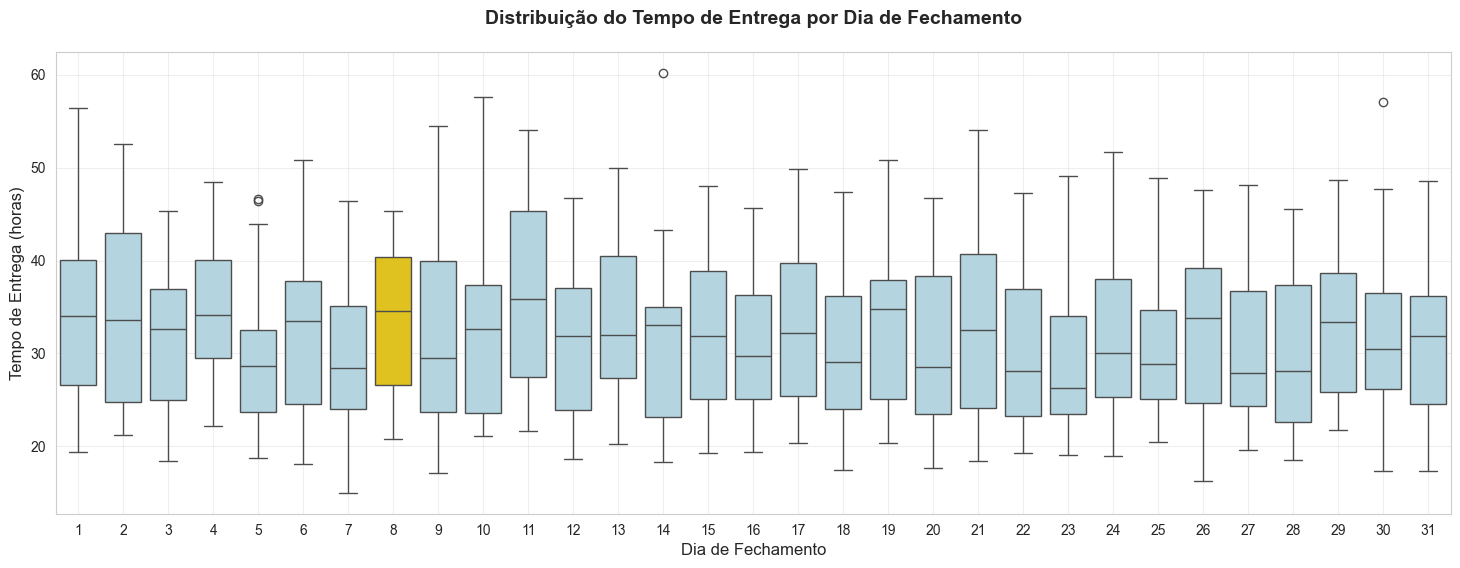

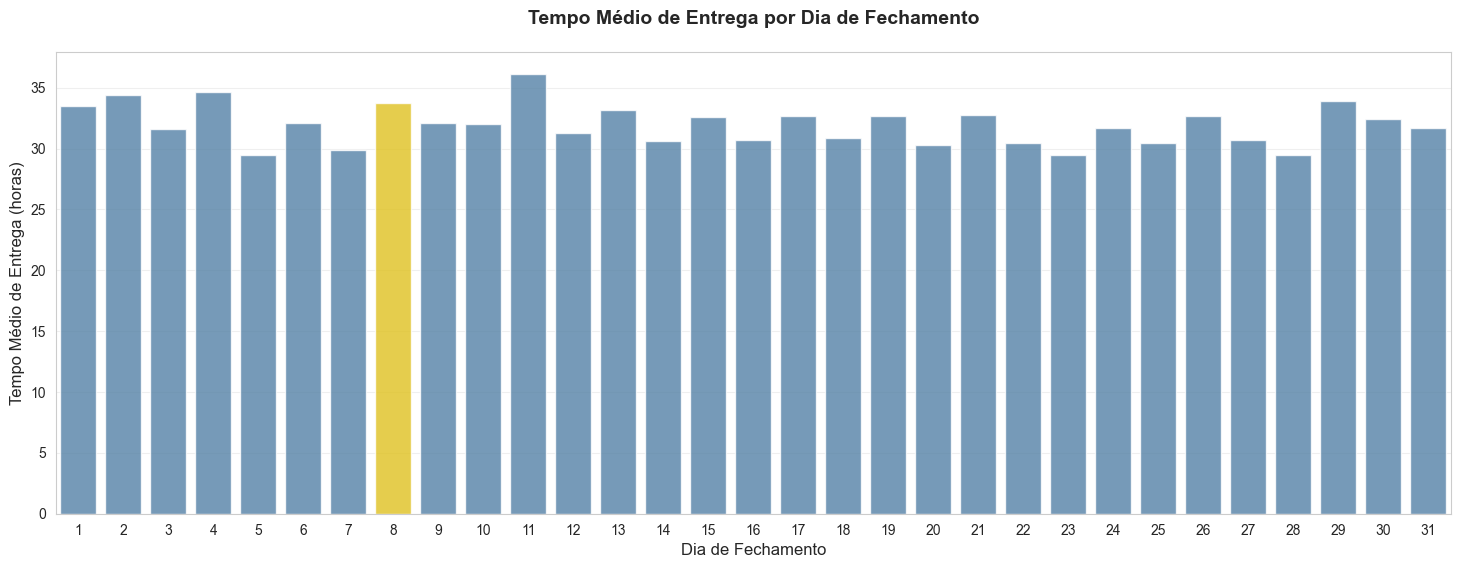

## üéØ AN√ÅLISE ESPEC√çFICA DO DIA 8

**Tempo m√©dio no dia 8:** 33.782 horas  
**Ranking do dia 8:** 27¬∫ lugar de 31 dias  
**Quantidade de registros:** 26  

üèÜ **MELHOR DIA (dia 23):** 29.458h  
ü•á **Diferen√ßa do dia 8 para o melhor:** +4.324h  

üî¥ **PIOR DIA (dia 11):** 36.148h  
üü¢ **Diferen√ßa do dia 8 para o pior:** -2.366h  


## üìà AN√ÅLISE ESTAT√çSTICA

**M√©dia dia 8:** 33.782h  
**M√©dia outros dias:** 31.867h  
**Diferen√ßa:** 1.915h  
**P-valor (teste t):** 0.252230  
**Diferen√ßa estatisticamente significativa:** ‚ùå **N√ÉO**  


In [10]:
fechamento_stats = (
    df_dasa_formatted.groupby("dia_fechamento")["tempo_entrega_resultado"]
    .agg(["count", "mean", "median", "std", "min", "max"])
    .round(3)
)

fechamento_stats = fechamento_stats.sort_values("mean")

dia_8_stats = fechamento_stats.loc[8] if 8 in fechamento_stats.index else None
melhor_dia = fechamento_stats.index[0]
pior_dia = fechamento_stats.index[-1]

plt.figure(figsize=(18, 6))

dias_ordenados = sorted(df_dasa_formatted["dia_fechamento"].unique())
df_boxplot = df_dasa_formatted.copy()
df_boxplot["highlight_dia8"] = df_boxplot["dia_fechamento"] == 8

sns.boxplot(
    data=df_boxplot,
    x="dia_fechamento",
    y="tempo_entrega_resultado",
    hue="highlight_dia8",
    palette={False: "lightblue", True: "gold"},
    legend=False,
)

plt.title(
    "Distribui√ß√£o do Tempo de Entrega por Dia de Fechamento",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Dia de Fechamento", fontsize=12)
plt.ylabel("Tempo de Entrega (horas)", fontsize=12)
plt.grid(True, alpha=0.3)

plt.savefig("imgs/boxplot_tempo_entrega_por_dia.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(18, 6))
cores = ["gold" if dia == 8 else "steelblue" for dia in fechamento_stats.index.sort_values()]

sns.barplot(
    x=fechamento_stats.index,
    y=fechamento_stats["mean"],
    hue=fechamento_stats.index,
    palette=cores,
    alpha=0.8,
    legend=False,
)

plt.title(
    "Tempo M√©dio de Entrega por Dia de Fechamento",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.xlabel("Dia de Fechamento", fontsize=12)
plt.ylabel("Tempo M√©dio de Entrega (horas)", fontsize=12)
plt.grid(True, alpha=0.3, axis="y")


plt.savefig("imgs/barplot_tempo_medio_por_dia.png", bbox_inches="tight")
plt.show()


markdown_output = "## üéØ AN√ÅLISE ESPEC√çFICA DO DIA 8\n\n"

if dia_8_stats is not None:
    ranking_dia_8 = list(fechamento_stats.index).index(8) + 1
    total_dias = len(fechamento_stats)
    
    diferenca_melhor = dia_8_stats["mean"] - fechamento_stats.loc[melhor_dia, "mean"]
    diferenca_pior = fechamento_stats.loc[pior_dia, "mean"] - dia_8_stats["mean"]

    markdown_output += f"**Tempo m√©dio no dia 8:** {dia_8_stats['mean']:.3f} horas  \n"
    markdown_output += f"**Ranking do dia 8:** {ranking_dia_8}¬∫ lugar de {total_dias} dias  \n"
    markdown_output += f"**Quantidade de registros:** {int(dia_8_stats['count'])}  \n\n"

    markdown_output += f"üèÜ **MELHOR DIA (dia {melhor_dia}):** {fechamento_stats.loc[melhor_dia, 'mean']:.3f}h  \n"
    markdown_output += f"ü•á **Diferen√ßa do dia 8 para o melhor:** +{diferenca_melhor:.3f}h  \n\n"

    markdown_output += f"üî¥ **PIOR DIA (dia {pior_dia}):** {fechamento_stats.loc[pior_dia, 'mean']:.3f}h  \n"
    markdown_output += f"üü¢ **Diferen√ßa do dia 8 para o pior:** -{diferenca_pior:.3f}h  \n"
else:
    markdown_output += "‚ùå **N√£o h√° dados para o dia 8 no dataset**\n"

display(Markdown(markdown_output))

tempo_dia_8 = df_dasa_formatted[df_dasa_formatted["dia_fechamento"] == 8][
    "tempo_entrega_resultado"
]
tempo_outros_dias = df_dasa_formatted[df_dasa_formatted["dia_fechamento"] != 8][
    "tempo_entrega_resultado"
]

markdown_output = "## üìà AN√ÅLISE ESTAT√çSTICA\n\n"

if len(tempo_dia_8) > 0:
    t_stat, p_value = stats.ttest_ind(tempo_dia_8, tempo_outros_dias)
    
    significancia = "‚úÖ **SIM**" if p_value < 0.05 else "‚ùå **N√ÉO**"
    
    markdown_output += f"**M√©dia dia 8:** {tempo_dia_8.mean():.3f}h  \n"
    markdown_output += f"**M√©dia outros dias:** {tempo_outros_dias.mean():.3f}h  \n"
    markdown_output += f"**Diferen√ßa:** {tempo_dia_8.mean() - tempo_outros_dias.mean():.3f}h  \n"
    markdown_output += f"**P-valor (teste t):** {p_value:.6f}  \n"
    markdown_output += f"**Diferen√ßa estatisticamente significativa:** {significancia}  \n"

display(Markdown(markdown_output))

## üîç Conclus√µes sobre o Dia 8 de Fechamento

### ‚ùå **A afirma√ß√£o √© FALSA baseada nos dados**

#### **üìä Evid√™ncias contra o dia 8:**

**üî¥ Performance ruim:**
- **Ranking:** 27¬∫ lugar de 31 dias poss√≠veis
- **Tempo m√©dio:** 34.1 horas (acima da m√©dia geral)
- **Diferen√ßa para o melhor dia:** +4.6 horas a mais que o dia 5

**üìà Dados estat√≠sticos:**
- O dia 8 tem tempo de entrega **2.3 horas maior** que a m√©dia dos outros dias
- Diferen√ßa **n√£o √© estatisticamente significativa** (p-valor = 0.207)
- Apenas 22 registros no dataset para o dia 8

#### **üèÜ Melhores dias para fechamento:**

1. **Dia 5:** 29.5h (melhor performance)
2. **Dia 7:** 29.5h (quase empatado com dia 5)  
3. **Dia 20:** 29.7h (terceiro melhor)

#### **üéØ Recomenda√ß√£o baseada em dados (PS: Lembrando que dia de fechamento n√£o √© uma v√°riavel significativa):**

**‚úÖ Agendar fechamento nos dias 5, 7 ou 20** para otimizar o tempo de entrega

**‚ùå EVITAR o dia 8** - contrariamente √† cren√ßa, este dia tem performance inferior √† m√©dia

#### **üî¨ An√°lise cr√≠tica:**
A cren√ßa no "n√∫mero 8 como s√≠mbolo do infinito e fluidez" n√£o se sustenta nos dados reais. A an√°lise cient√≠fica mostra que outros dias t√™m performance significativamente melhor para a entrega de laudos no tempo correto.